# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [187]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import openweathermapy as owm
import pandas as pd
import numpy as np
import requests
import json
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [157]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
len(cities)

606

In [171]:
# start off using a temporary list with fewer cities
# search more likely successful if including country code
smaller_list = [cities[i] + ',' + countries[i] for i, city in enumerate(cities[0:8])]
print(smaller_list)

['chuy,uy', 'odweyne,so', 'lasa,cn', 'esperance,au', 'indianola,us', 'albany,au', 'chumikan,ru', 'ribeira grande,pt']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [172]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'units=imperial'

In [175]:
print('Beginning Data Retrieval')
print('-----------------------------')

weather_check = []
for i, city in enumerate(smaller_list):
    url = base_url + units + '&appid=' + api_key + '&q=' + city
    try:
        response = requests.get(url).json()
        # temp = response['main']['temp']        # original from weather check
        
        # capture all weather data in variables
        city = response['name']
        cloudiness = response['clouds']['all']
        country = response['sys']['country']
        date = int(response['dt'])
        humidity = response['main']['humidity']
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        max_temp = response['main']['temp_max']
        wind_speed = response['wind']['speed']
        
        # append weather data variables to dictionary
        weather_check.append({'city':city,
                              'cloudiness':cloudiness,
                              'country':country,
                              'date':date,
                              'humidity':humidity,
                              'lat':lat,
                              'lng':lng,
                              'max_temp':max_temp,
                              'wind_speed':wind_speed})
        
        # confirm record is found with process statement
        print(f"Processing record {i} of Set 1 | {city}")
        
    except:
        # confirm record is missing with skip statement
        print('City not found. Skipping...')

print('-----------------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
-----------------------------
Processing record 0 of Set 1 | Chuy
City not found. Skipping...
City not found. Skipping...
Processing record 3 of Set 1 | Esperance
Processing record 4 of Set 1 | Indianola
Processing record 5 of Set 1 | Albany
Processing record 6 of Set 1 | Chumikan
Processing record 7 of Set 1 | Ribeira Grande
-----------------------------
Data Retrieval Complete


In [185]:
print(json.dumps(weather_check,indent=4,sort_keys=True))

[
    {
        "city": "Chuy",
        "cloudiness": 92,
        "country": "UY",
        "date": 1538118500,
        "humidity": 96,
        "lat": -33.69,
        "lng": -53.46,
        "max_temp": 59.19,
        "wind_speed": 15.5
    },
    {
        "city": "Esperance",
        "cloudiness": 0,
        "country": "AU",
        "date": 1538118712,
        "humidity": 70,
        "lat": -33.86,
        "lng": 121.89,
        "max_temp": 61.89,
        "wind_speed": 10.8
    },
    {
        "city": "Indianola",
        "cloudiness": 1,
        "country": "US",
        "date": 1538117580,
        "humidity": 74,
        "lat": 40.24,
        "lng": -100.42,
        "max_temp": 51.98,
        "wind_speed": 14.99
    },
    {
        "city": "Albany",
        "cloudiness": 0,
        "country": "AU",
        "date": 1538118454,
        "humidity": 59,
        "lat": -35.02,
        "lng": 117.88,
        "max_temp": 61.53,
        "wind_speed": 13.82
    },
    {
        "city": "Chum

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [193]:
# load into dataframe
df = pd.DataFrame(weather_check)

# write csv without index, prepends comma otherwise
df.to_csv(output_data_file,index=False)

# display dataframe
df.head()

,city,cloudiness,country,date,humidity,lat,lng,max_temp,wind_speed
0,Chuy,92,UY,1538118500,96,-33.69,-53.46,59.19,15.50
1,Esperance,0,AU,1538118712,70,-33.86,121.89,61.89,10.80
2,Indianola,1,US,1538117580,74,40.24,-100.42,51.98,14.99
3,Albany,0,AU,1538118454,59,-35.02,117.88,61.53,13.82
4,Chumikan,0,RU,1538118712,51,54.72,135.31,64.14,11.81


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0,0.5,'Max Temperature (F)')

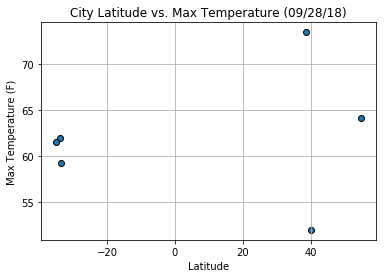

In [194]:
df.plot.scatter('lat','max_temp',s=36,edgecolors='black',figsize=(6,4))
plt.grid()
plt.title('City Latitude vs. Max Temperature (09/28/18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#### Latitude vs. Humidity Plot

Text(0,0.5,'Humidity (%)')

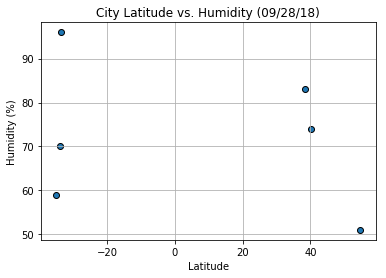

In [195]:
df.plot.scatter('lat','humidity',s=36,edgecolors='black',figsize=(6,4))
plt.grid()
plt.title('City Latitude vs. Humidity (09/28/18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#### Latitude vs. Cloudiness Plot

Text(0,0.5,'Cloudiness (%)')

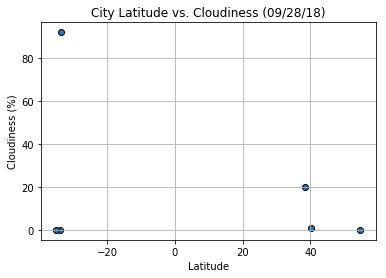

In [196]:
df.plot.scatter('lat','cloudiness',s=36,edgecolors='black',figsize=(6,4))
plt.grid()
plt.title('City Latitude vs. Cloudiness (09/28/18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#### Latitude vs. Wind Speed Plot

Text(0,0.5,'Wind Speed (mph)')

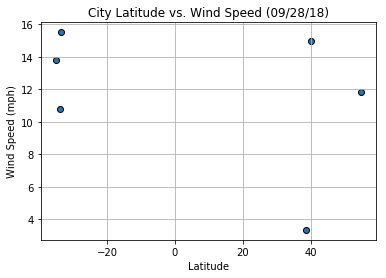

In [197]:
df.plot.scatter('lat','wind_speed',s=36,edgecolors='black',figsize=(6,4))
plt.grid()
plt.title('City Latitude vs. Wind Speed (09/28/18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')